# Assignment A1b - Functions and Computation
---
### Ryan Lin


## Imports

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from gabor import *
from trig import *
from gammatone import *
from A1b2 import *


## 1a sinewave

In [2]:
sinewave(0.0, f=5, d=0.05)

np.float64(-1.0)

## 1b gabor


spatial signal

In [3]:
def test_gaussian_envelope_center():
    sigma = 1.0
    val_at_zero = gaussian_envelope(0, sigma)
    assert np.isclose(val_at_zero, 1.0), f"Expected 1.0, got {val_at_zero}"
    print("test_gaussian_envelope_center: PASSED")

test_gaussian_envelope_center()


test_gaussian_envelope_center: PASSED


In [4]:
def test_gaussian_envelope_symmetry():
    sigma = 1.0
    t_vals = np.linspace(-3, 3, 10)
    for t in t_vals:
        pos_val = gaussian_envelope(t, sigma)
        neg_val = gaussian_envelope(-t, sigma)
        assert np.isclose(pos_val, neg_val), f"Asymmetry at t={t}"
    print("test_gaussian_envelope_symmetry: PASSED")

test_gaussian_envelope_symmetry()


test_gaussian_envelope_symmetry: PASSED


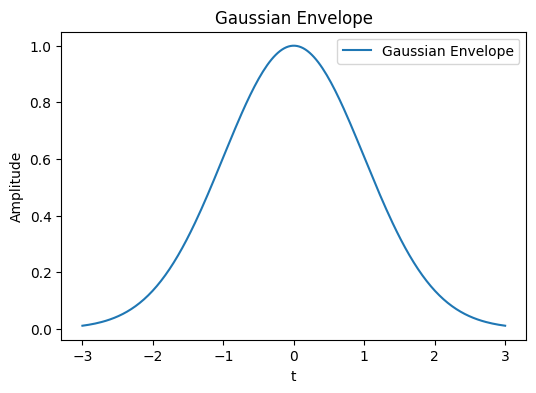

In [5]:
t_plot = np.linspace(-3, 3, 200)
sigma = 1.0
env_vals = gaussian_envelope(t_plot, sigma)

plt.figure(figsize=(6,4))
plt.plot(t_plot, env_vals, label='Gaussian Envelope')
plt.title("Gaussian Envelope")
plt.xlabel("t")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


In [6]:
def test_gabor_value_at_zero():
    sigma = 1.0
    f = 5.0
    phi = np.pi / 2
    a = 2.0
    val_at_zero = gabor(0, sigma, f, phi, a)
    expected = a * np.cos(phi)  # = 2.0 * 0 = 0
    assert np.isclose(val_at_zero, expected), f"Expected {expected}, got {val_at_zero}"
    print("test_gabor_value_at_zero: PASSED")

test_gabor_value_at_zero()


test_gabor_value_at_zero: PASSED


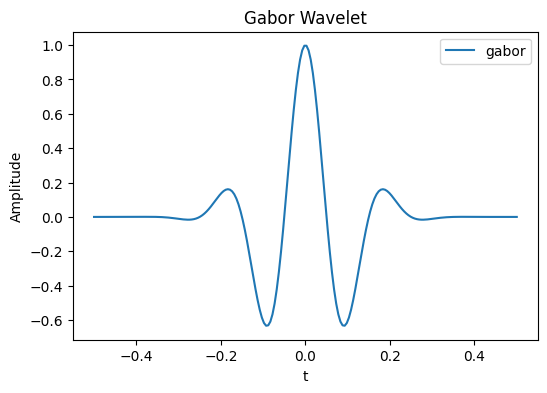

In [7]:
t_plot = np.linspace(-0.5, 0.5, 200)
sigma = 0.1
f = 5.0
phi = 0
a = 1

gabor_vals = gabor(t_plot, sigma, f, phi, a)
plt.figure(figsize=(6,4))
plt.plot(t_plot, gabor_vals, label='gabor')
plt.title("Gabor Wavelet")
plt.xlabel("t")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


In [8]:
def test_gaboro_value_at_zero():
    sigma = 1.0
    f = 5.0
    phi = 0
    a = 2.0
    val_at_zero = gaboro(t=0, sigma=sigma,f=f, phi=phi, a=a)
    expected = a * np.sin(phi)  # = 2 * 0 = 0
    assert np.isclose(val_at_zero, expected), f"Expected {expected}, got {val_at_zero}"
    print("test_gaboro_value_at_zero: PASSED")

test_gaboro_value_at_zero()


test_gaboro_value_at_zero: PASSED


In [9]:
def test_gabore_equivalence():
    sigma = 1.0
    f = 5.0
    phi = np.pi / 3
    a = 1.5
    test_ts = np.linspace(-1, 1, 100)

    for tt in test_ts:
        val_gabore = gabore(tt, sigma, f, phi, a)
        val_gabor  = gabor(tt, sigma, f, phi, a)
        assert np.isclose(val_gabore, val_gabor), "Mismatch between gabore and gabor"
    print("test_gabore_equivalence: PASSED")

test_gabore_equivalence()


test_gabore_equivalence: PASSED


In [10]:
def test_gabor_norm():
    f = 5.0
    sigma = 1.0
    fs = 1000  
    d = 0

    norm_const = gabor_norm(f, sigma, fs, d)

    # Recreate the time axis (same approach as gabor_norm)
    t_range = 3 * sigma
    num_samples = int(2 * t_range * fs)
    t = np.linspace(-t_range, t_range, num_samples)

    # Construct the raw wavelet (cos-based) for testing
    g_values = gaussian_envelope(t, sigma) * np.cos(2 * np.pi * f * t + d)

    # Multiply by normalizing constant
    normed_values = norm_const * g_values

    # Numerically integrate the square
    energy = np.trapezoid(normed_values**2, t)

    assert np.isclose(energy, 1.0, atol=1e-3), f"Energy not close to 1: {energy}"
    print(f"test_gabor_norm: PASSED (energy={energy:.5f})")

test_gabor_norm()


test_gabor_norm: PASSED (energy=1.00000)


In [11]:
def test_gabore_norm():
    f = 5.0
    sigma = 1.0
    fs = 1000
    d = 0

    norm_const = gabore_norm(f, sigma, fs, d)
    t_range = 3 * sigma
    num_samples = int(2 * t_range * fs)
    t = np.linspace(-t_range, t_range, num_samples)

    g_values = gaussian_envelope(t, sigma) * np.cos(2 * np.pi * f * t + d)
    normed_values = norm_const * g_values

    energy = np.trapezoid(normed_values**2, t)
    assert np.isclose(energy, 1.0, atol=1e-3), f"Energy not close to 1: {energy}"
    print(f"test_gabore_norm: PASSED (energy={energy:.5f})")

test_gabore_norm()


test_gabore_norm: PASSED (energy=1.00000)


In [12]:
def test_gaboro_norm():
    f = 5.0
    sigma = 1.0
    fs = 1000
    d = 0

    norm_const = gaboro_norm(f, sigma, fs, d)
    t_range = 3 * sigma
    num_samples = int(2 * t_range * fs)
    t = np.linspace(-t_range, t_range, num_samples)

    g_values = gaussian_envelope(t, sigma) * np.sin(2 * np.pi * f * t + d)
    normed_values = norm_const * g_values

    energy = np.trapezoid(normed_values**2, t)
    assert np.isclose(energy, 1.0, atol=1e-3), f"Energy not close to 1: {energy}"
    print(f"test_gaboro_norm: PASSED (energy={energy:.5f})")

test_gaboro_norm()


test_gaboro_norm: PASSED (energy=1.00000)


## 1c gammatone

cochlear signal

In [13]:

norm = gammatone_norm(f=100, n=4)
gammatone(0.01, a=norm, f=100, n=4)




np.float64(0.02617377836884151)

## 2a localmaxima

In [14]:
def test_localmaxima():
    signal = [0, 1, 0, 2, 1, 3, 2]
    expected_output = [1, 3, 5]
    assert localmaxima(signal) == expected_output
    print("localmaxima test passed!")


test_localmaxima()

localmaxima test passed!


## 2b crossings

In [15]:
def test_threshold_crossings():
    signal = [0, 1, 2, 1, 0, 2, 3, 1]
    threshold = 1.5
    expected_output_both = [2, 3, 5, 7]
    expected_output_negpos = [2, 5]
    expected_output_posneg = [3, 7]
    assert np.array_equal(crossings(signal, threshold, "both"), expected_output_both)
    assert np.array_equal(crossings(signal, threshold, "negpos"), expected_output_negpos)
    assert np.array_equal(crossings(signal, threshold, "posneg"), expected_output_posneg)
    print("threshold_crossings tests passed!")


test_threshold_crossings()


threshold_crossings tests passed!


## 2c envelope

In [16]:
def test_envelope():
    signal = [0, 2, 4, 6, 8, 10]
    nblocks = 2
    expected_lower = [0, 6]
    expected_upper = [4, 10]
    expected_indices = [0, 3]
    lower, upper, indices = envelope(signal, nblocks)
    assert np.array_equal(lower, expected_lower)
    assert np.array_equal(upper, expected_upper)
    assert np.array_equal(indices, expected_indices)
    print("envelope test passed!")

test_envelope()

envelope test passed!


# Check

In [17]:
sinewave(0.0, f=5, d=0.05)

np.float64(-1.0)

In [18]:
gabore(0.0, f=100, sigma=0.01)

np.float64(1.0)

In [19]:
gaboro(-3, f=0.0625, sigma=8)

np.float64(-0.8611504148937256)

In [20]:
gabore_norm(f=100, sigma=0.01, fs=10000)

np.float64(10.62266015657115)

In [21]:
gaboro(0.003, f=100, sigma=0.01)

np.float64(0.9092076346591274)

In [22]:
gammatone(0.01, f=100)

np.float64(5.013774056724392e-07)

In [23]:
localmaxima([1, 3, 2, -2 ,2, 4 ,8, 6])


[1, 6]

In [24]:
crossings([-1, 0, 1, 2 ,0 ,-2], threshold=1, dir='both')

array([2, 4])

In [25]:
y = np.array([5, 5, 2, 3, 4, 3, -6, -9, 0, -3, 9, -7])
ylower, yupper, blockindices = envelope(y, nblocks=3)
print(blockindices)

[0 4 8]


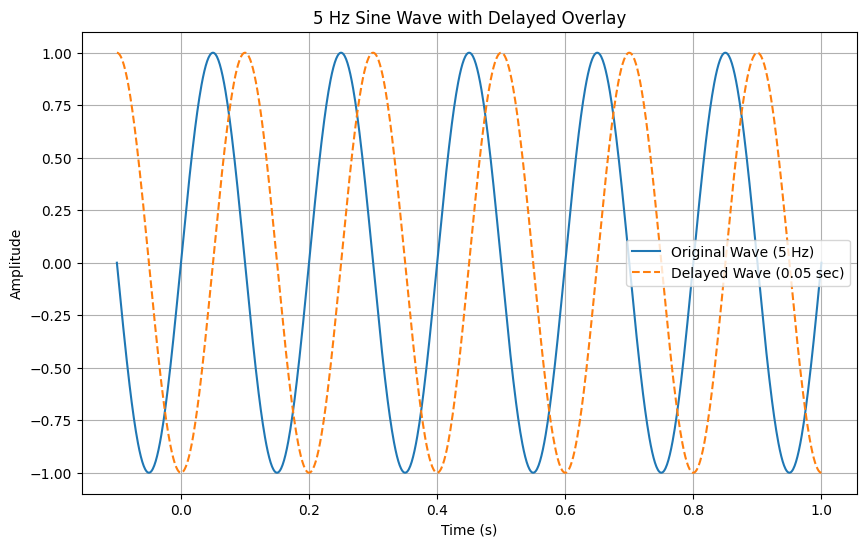

In [26]:
# Plot a 5 Hz sine wave and overlay a delayed sine wave
t = np.linspace(-0.1, 1.0, 1000)  # Time range from -0.1 to 1.0 seconds
f = 5  # Frequency in Hz
delay = 0.05  # Delay in seconds

original_wave = sinewave(t, f)
delayed_wave = sinewave(t, f, delay)

plt.figure(figsize=(10, 6))
plt.plot(t, original_wave, label='Original Wave (5 Hz)', linestyle='-')
plt.plot(t, delayed_wave, label='Delayed Wave (0.05 sec)', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('5 Hz Sine Wave with Delayed Overlay')
plt.legend()
plt.grid(True)
plt.show()


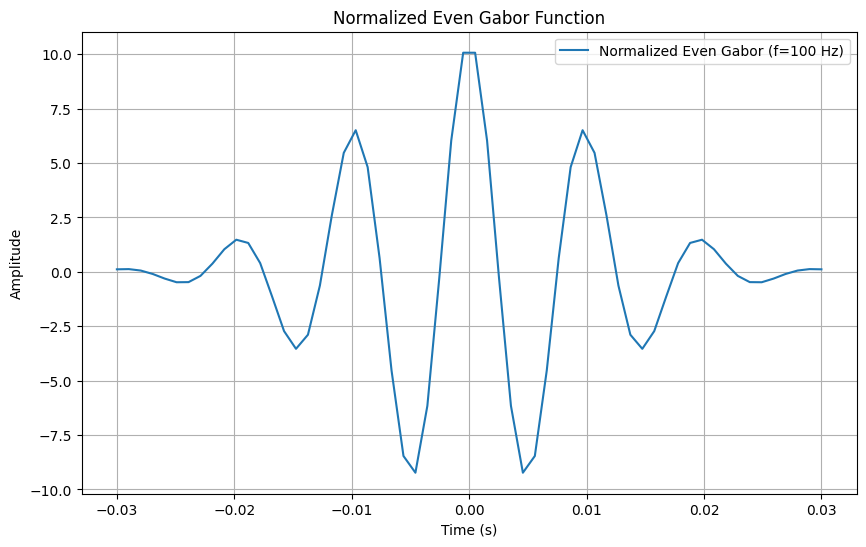

In [30]:
# Plot normalized even Gabor function
f = 100  # Frequency in Hz
sigma = 1 / f  # Standard deviation
fs = 1000  # Sampling frequency
t = np.linspace(-3 * sigma, 3 * sigma, int(6 * sigma * fs))  # Time vector

# Normalizing constant
norm_factor = gabor_norm(f, sigma, fs)

# Normalized Gabor function
gabor_function = gabor(t, sigma, f, a = norm_factor)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t, gabor_function, label='Normalized Even Gabor (f=100 Hz)', linestyle='-')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Normalized Even Gabor Function')
plt.legend()
plt.grid(True)
plt.show()


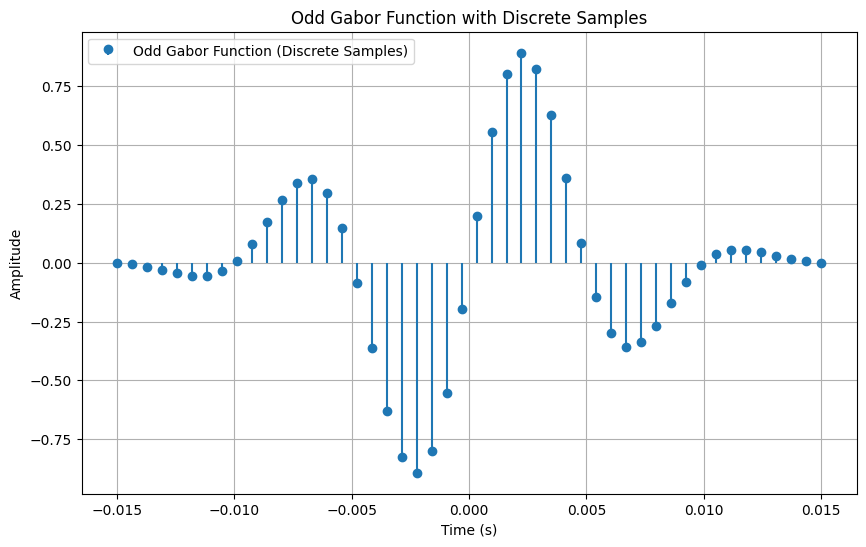

In [33]:
# Plot odd Gabor function with discrete samples
samples_per_period = 16  # Samples per period
sigma_samples = 8  # Sigma in samples
fs = f * samples_per_period  # Sampling frequency
t = np.linspace(-3 * sigma_samples / fs, 3 * sigma_samples / fs, 6 * sigma_samples)  # Time vector

# Generate odd Gabor function
gabor_odd = gaboro(t, sigma_samples / fs, f)

# Stem plot
plt.figure(figsize=(10, 6))
plt.stem(t, gabor_odd, basefmt=" ", label='Odd Gabor Function (Discrete Samples)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Odd Gabor Function with Discrete Samples')
plt.legend()
plt.grid(True)
plt.show()



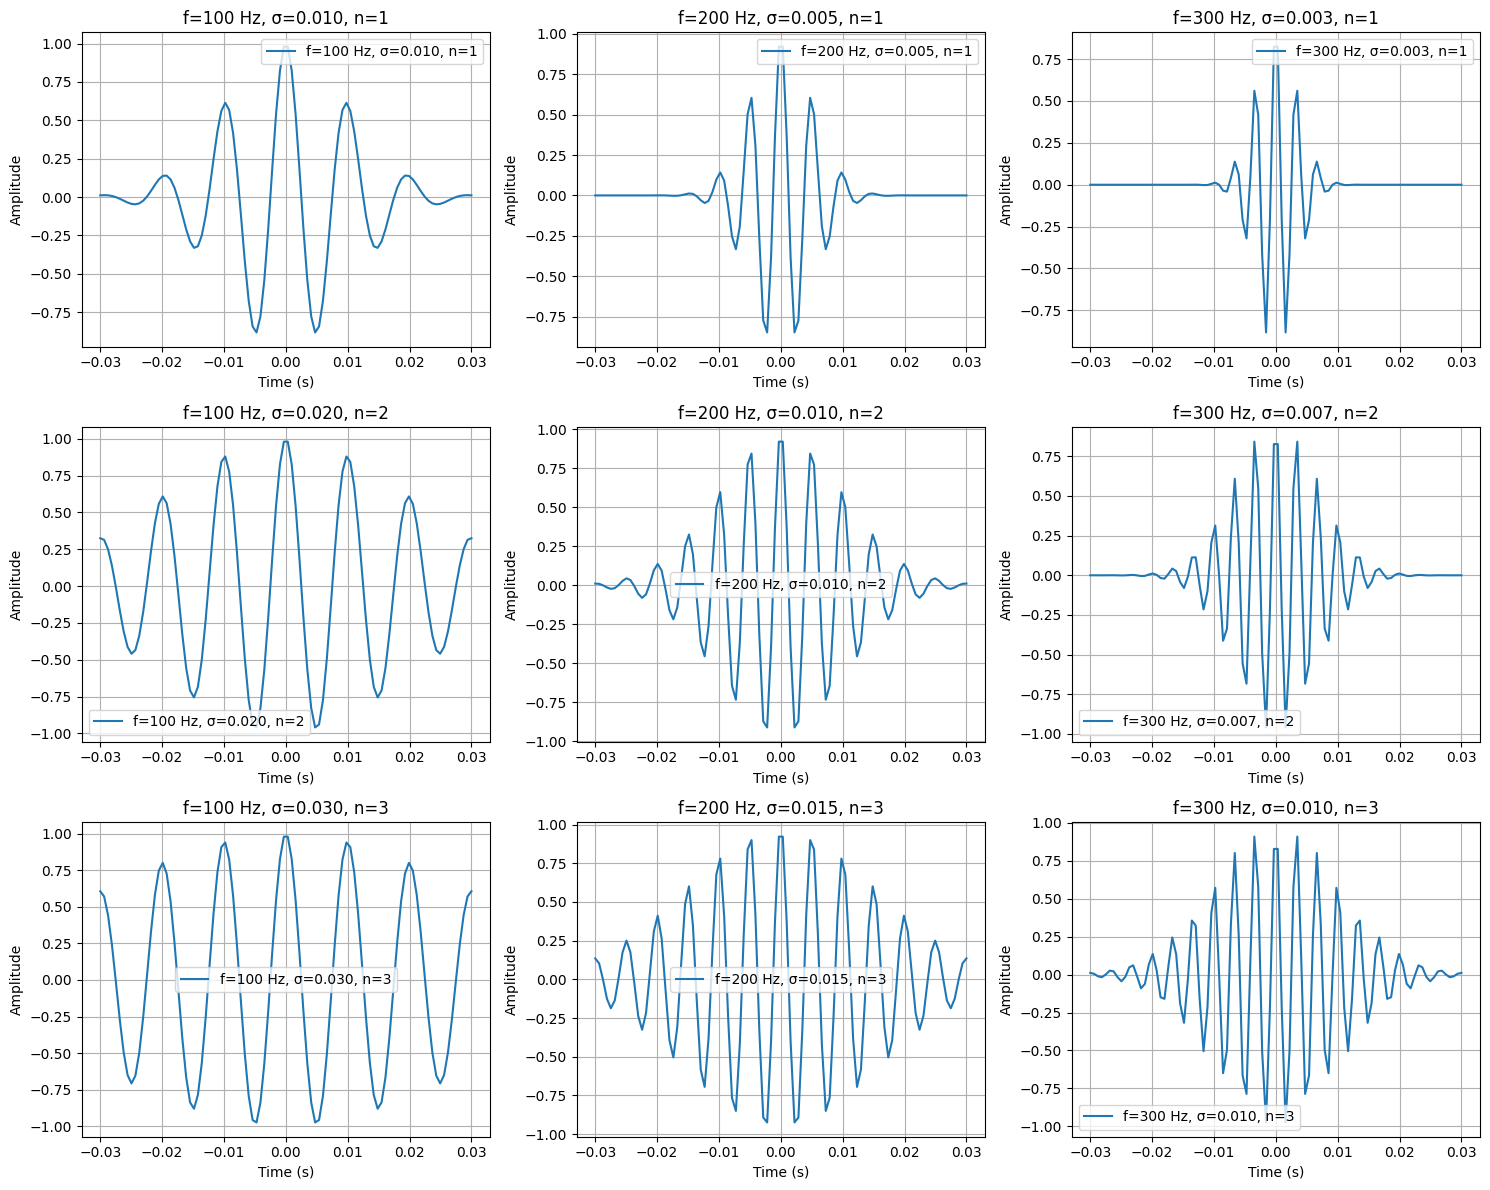

In [35]:
import numpy as np
from trig import *
import matplotlib.pyplot as plt

def gaussian_envelope(t, sigma):
    return np.e ** (- ((t**2)  / (2 * sigma**2)))

def gabor(t, sigma, f, phi=0, a=1):
    return a * gaussian_envelope(t, sigma) * coswave_phi(t, f, phi)

def create_gabor_grid(frequencies, widths, samples_per_period):
    fig, axes = plt.subplots(len(widths), len(frequencies), figsize=(15, 12))

    fixed_t_range = np.linspace(-3 * (1 / frequencies[0]), 3 * (1 / frequencies[0]), int(6 * (1 / frequencies[0]) * frequencies[0] * samples_per_period))

    for i, n in enumerate(widths):
        for j, f in enumerate(frequencies):
            sigma = n / f
            fs = f * samples_per_period
            t = fixed_t_range  # Use fixed t range for consistent scaling

            gabor_function = gabor(t, sigma, f)

            ax = axes[i, j]
            ax.plot(t, gabor_function, label=f"f={f} Hz, σ={sigma:.3f}, n={n}")
            ax.set_title(f"f={f} Hz, σ={sigma:.3f}, n={n}")
            ax.set_xlabel("Time (s)")
            ax.set_ylabel("Amplitude")
            ax.legend()
            ax.grid(True)

    plt.tight_layout()
    plt.show()

# Parameters for the grid
frequencies = [100, 200, 300]  # Frequencies in Hz
width_factors = [1, 2, 3]  # Factors for sigma (σ = n / f)
samples_per_period = 16  # Samples per period

# Create and display the grid of Gabor functions
create_gabor_grid(frequencies, width_factors, samples_per_period)


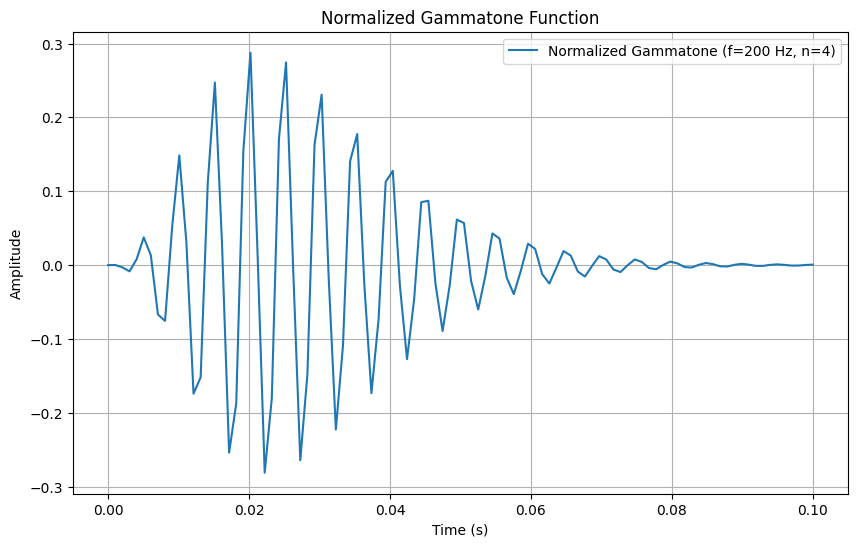

In [39]:
import numpy as np
from trig import *
import matplotlib.pyplot as plt

def erb(f):
    return 24.7*((4.37 * f)/1001)

def bandwidth(f):
    return 1.019 * erb(f)

def gammatone(t, f=1.0, n=4, d=0.0, a=1.0):
    t = np.maximum(t, 0) # t >= 0
    b = bandwidth(f)
    return a * (t**(n-1)) * np.exp(-2 * np.pi * b * t) * coswave(t, f, d)

def gammatone_norm(f=1.0, n=4, fs=1000):
    t = np.linspace(0, 0.1, int(0.1 * fs))  # 0 to 0.1 seconds
    g = gammatone(t, f, n, 0.0, 1.0)
    return 1 / np.sqrt(np.sum(g**2))

# Plot normalized gammatone function
f = 200  # Frequency in Hz
n = 4  # Shape parameter
fs = 1000  # Sampling frequency
t = np.linspace(0, 0.1, int(0.1 * fs))  # Time vector

# Normalizing constant
norm_factor = gammatone_norm(f, n, fs)

# Normalized gammatone function
gammatone_function = norm_factor * gammatone(t, f, n, 0.0)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t, gammatone_function, label=f"Normalized Gammatone (f={f} Hz, n={n})")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Normalized Gammatone Function")
plt.legend()
plt.grid(True)
plt.show()

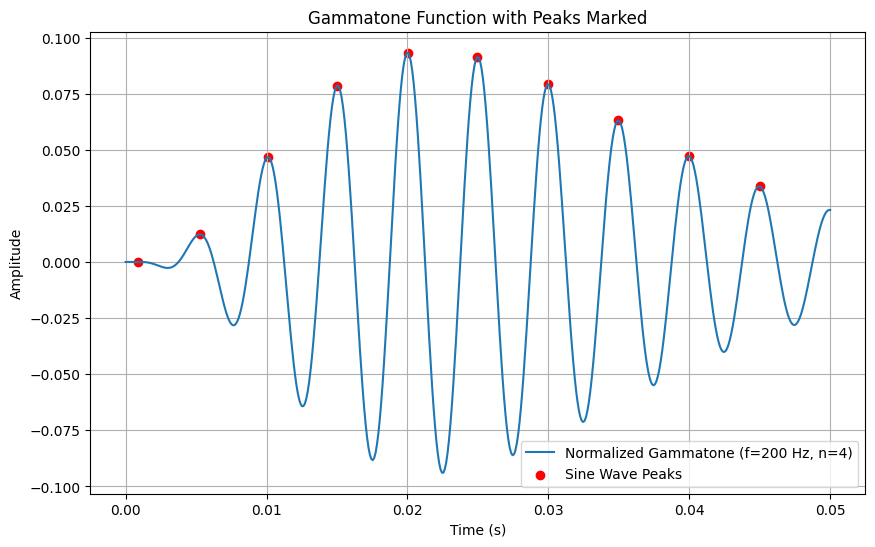

In [38]:
# Plot gammatone function with markers at sine wave peaks
f = 200  # Frequency in Hz
n = 4  # Shape parameter
fs = 10000  # Sampling frequency
t = np.linspace(0, 0.05, int(0.05 * fs))  # Time vector (0 to 0.05 seconds)

# Generate gammatone function
norm_factor = gammatone_norm(f, n, fs)
gammatone_function = norm_factor * gammatone(t, f, n, 0.0)

# Find local maxima
maxima_indices = localmaxima(gammatone_function)
maxima_times = t[maxima_indices]
maxima_values = gammatone_function[maxima_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t, gammatone_function, label=f"Normalized Gammatone (f={f} Hz, n={n})")
plt.scatter(maxima_times, maxima_values, color='red', label='Sine Wave Peaks')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Gammatone Function with Peaks Marked")
plt.legend()
plt.grid(True)
plt.show()